In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture

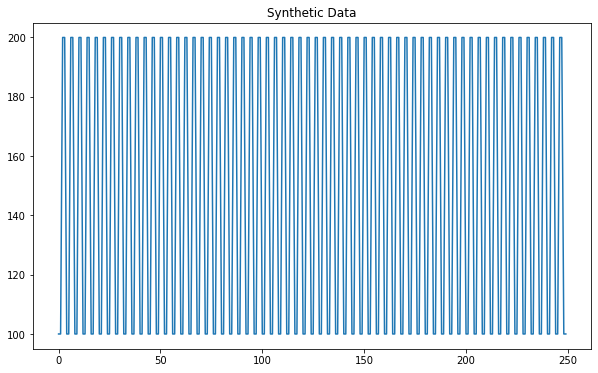

In [2]:
x = np.arange(0, 250)
y = np.empty([250], dtype = int)
count = 0
for i in range (0, 250, 2):
    count = count + 1
    if(count%2 == 1):
        y[i:i+25] = 100
    else:
        y[i:i+25] = 200
sd = y
plt.figure(figsize=(10,6))
plt.plot(x, y)
plt.title("Synthetic Data")
plt.show()

In [3]:
pd.DataFrame(sd).describe()

,0
count,250.000000
mean,149.600000
std,50.098698
min,100.000000
25%,100.000000
50%,100.000000
75%,200.000000
max,200.000000


In [4]:
seasonal_data = pd.DataFrame(zip(x,y),columns=['Time','Value'])
seasonal_data

,Time,Value
0,0,100
1,1,100
2,2,200
3,3,200
4,4,100
...,...,...
245,245,100
246,246,200
247,247,200
248,248,100


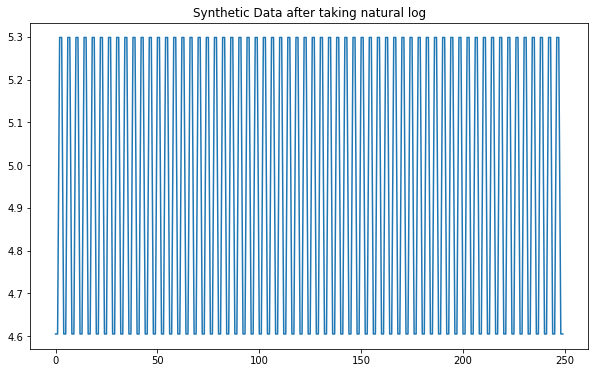

In [5]:
log_data = np.log(seasonal_data['Value'])
plt.figure(figsize=(10,6))
plt.plot(seasonal_data['Time'], log_data)
plt.title("Synthetic Data after taking natural log")
plt.show()

In [6]:
nlog_data = pd.DataFrame(zip(seasonal_data['Time'], log_data),columns=['Time','Log Value'])
nlog_data

,Time,Log Value
0,0,4.605170
1,1,4.605170
2,2,5.298317
3,3,5.298317
4,4,4.605170
...,...,...
245,245,4.605170
246,246,5.298317
247,247,5.298317
248,248,4.605170


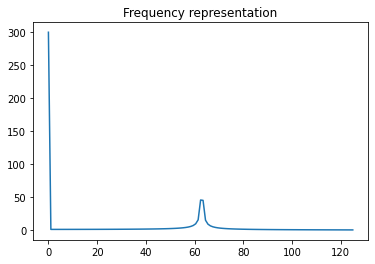

In [7]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Frequency representation")
plt.show()

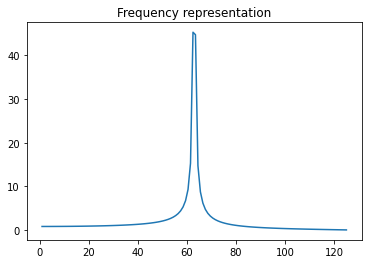

In [8]:
N = 250
sr = 1
y = np.array(seasonal_data['Value'])
f = fftpack.fftfreq(len(y))
yf = fftpack.fft(y)

T = 1.0 / N
x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), int(N/2))
fig, ax = plt.subplots()
ax.plot(xf[1:], 2.0/N * np.abs(yf[1:N//2]))
plt.title("Frequency representation")
plt.show()

In [9]:
freq_ampli = pd.DataFrame(zip(np.abs(f[:N//2]),2.0/N * np.abs(yf[:N//2])),columns=['Freq','Ampli'])
freq_ampli

,Freq,Ampli
0,0.000,299.200000
1,0.004,0.800190
2,0.008,0.800759
3,0.012,0.801709
4,0.016,0.803044
...,...,...
120,0.480,0.050632
121,0.484,0.040399
122,0.488,0.030238
123,0.492,0.020130


In [10]:
frame_size = 50
Fs = 1
dt = 1/Fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
yf1 = yf[yf != 0]
yf1

array([ 3.74000000e+04-0.00000000e+00j, -1.00015796e+02-1.25690172e+00j,
       -1.00063232e+02-2.51539296e+00j, -1.00142460e+02-3.77707131e+00j,
       -1.00253730e+02-5.04355054e+00j, -1.00397399e+02-6.31646892e+00j,
       -1.00573926e+02-7.59749780e+00j, -1.00783883e+02-8.88835055e+00j,
       -1.01027955e+02-1.01907920e+01j, -1.01306948e+02-1.15066484e+01j,
       -1.01621794e+02-1.28378180e+01j, -1.01973557e+02-1.41862830e+01j,
       -1.02363448e+02-1.55541214e+01j, -1.02792830e+02-1.69435215e+01j,
       -1.03263233e+02-1.83567963e+01j, -1.03776365e+02-1.97964004e+01j,
       -1.04334133e+02-2.12649490e+01j, -1.04938657e+02-2.27652380e+01j,
       -1.05592293e+02-2.43002676e+01j, -1.06297656e+02-2.58732688e+01j,
       -1.07057650e+02-2.74877326e+01j, -1.07875500e+02-2.91474448e+01j,
       -1.08754788e+02-3.08565238e+01j, -1.09699494e+02-3.26194659e+01j,
       -1.10714051e+02-3.44411958e+01j, -1.11803399e+02-3.63271264e+01j,
       -1.12973054e+02-3.82832273e+01j, -1.14229186

In [11]:
quefrency = np.fft.rfftfreq(np.log(yf1).size,freq_vector[1] - freq_vector[0])
cepstrum = np.fft.rfft(np.log(np.abs(yf1)))

In [12]:
quefrency[1:]

array([ 0.20080321,  0.40160643,  0.60240964,  0.80321285,  1.00401606,
        1.20481928,  1.40562249,  1.6064257 ,  1.80722892,  2.00803213,
        2.20883534,  2.40963855,  2.61044177,  2.81124498,  3.01204819,
        3.21285141,  3.41365462,  3.61445783,  3.81526104,  4.01606426,
        4.21686747,  4.41767068,  4.6184739 ,  4.81927711,  5.02008032,
        5.22088353,  5.42168675,  5.62248996,  5.82329317,  6.02409639,
        6.2248996 ,  6.42570281,  6.62650602,  6.82730924,  7.02811245,
        7.22891566,  7.42971888,  7.63052209,  7.8313253 ,  8.03212851,
        8.23293173,  8.43373494,  8.63453815,  8.83534137,  9.03614458,
        9.23694779,  9.437751  ,  9.63855422,  9.83935743, 10.04016064,
       10.24096386, 10.44176707, 10.64257028, 10.84337349, 11.04417671,
       11.24497992, 11.44578313, 11.64658635, 11.84738956, 12.04819277,
       12.24899598, 12.4497992 , 12.65060241, 12.85140562, 13.05220884,
       13.25301205, 13.45381526, 13.65461847, 13.85542169, 14.05

In [13]:
cepstrum[1:]

array([ 1.24403032e+02-1.44328993e-15j, -1.75334761e+02-6.72292083e-15j,
        4.51844695e+01-5.32907052e-15j,  3.91837221e+01-3.51801921e-15j,
        2.59534952e+01-1.05471187e-14j, -5.17291544e+01-1.38934003e-14j,
        2.21776273e+01-1.06581410e-14j,  2.29813900e+01-1.55153668e-14j,
        1.54520911e+01-1.09912079e-14j, -2.72701904e+01-1.97090608e-14j,
        1.60813531e+01-1.65423231e-14j,  1.74101030e+01-2.09277040e-14j,
        1.15601611e+01-2.22044605e-14j, -1.68776266e+01-2.08175491e-14j,
        1.33005876e+01-1.80966353e-14j,  1.45441496e+01-2.28428387e-14j,
        9.57698254e+00-2.75335310e-14j, -1.11464580e+01-3.17974813e-14j,
        1.17193926e+01-2.35367281e-14j,  1.27776641e+01-2.38142839e-14j,
        8.39800826e+00-2.77555756e-14j, -7.52237600e+00-4.01532106e-14j,
        1.07017711e+01-3.88578059e-14j,  1.15692108e+01-3.50830476e-14j,
        7.63044004e+00-4.04121181e-14j, -5.02677243e+00-3.56689504e-14j,
        9.99165210e+00-3.67483821e-14j,  1.06842491

In [14]:
cep = pd.DataFrame(zip(quefrency,cepstrum.real),columns=['Quefrency','Cepstrum'])
cep

,Quefrency,Cepstrum
0,0.000000,1157.439946
1,0.200803,124.403032
2,0.401606,-175.334761
3,0.602410,45.184470
4,0.803213,39.183722
...,...,...
120,24.096386,5.985986
121,24.297189,5.879931
122,24.497992,5.852162
123,24.698795,5.966714


In [15]:
# GMM on normal time series data
dfx = np.array(seasonal_data['Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm0 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [16]:
# GMM on natural log values of time series data 
dfx = np.array(nlog_data['Log Value']).reshape(-1,1)
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm1 = gmm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number o

In [17]:
# GMM on fft data
dfx = freq_ampli.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm2 = gmm

In [18]:
# GMM on cepstrum data 
dfx = cep.iloc[1:,1:]
lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(dfx)
        bic.append(gmm.bic(dfx))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm3 = gmm

Results of GMM on normal time series data

In [19]:
seasonal_data.describe()

,Time,Value
count,250.000000,250.000000
mean,124.500000,149.600000
std,72.312977,50.098698
min,0.000000,100.000000
25%,62.250000,100.000000
50%,124.500000,100.000000
75%,186.750000,200.000000
max,249.000000,200.000000


In [20]:
best_gmm0

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [21]:
best_gmm0.weights_

array([0.504, 0.496])

In [22]:
best_gmm0.means_

array([[100.],
       [200.]])

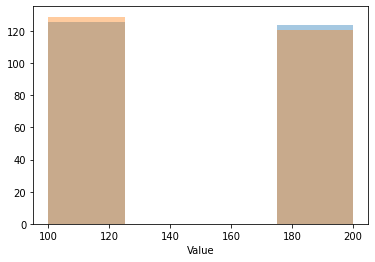

In [23]:
#Time Series
sns.distplot(seasonal_data['Value'],kde=False)
z,_ = best_gmm0.sample(250)
sns.distplot(z,kde=False)

In [24]:
#Time Series
print(best_gmm0.score(np.array(seasonal_data['Value']).reshape(-1,1)))
#print(best_gmm0.score(z))

5.295701565558862


Results of GMM on natural log values of time series data

In [25]:
nlog_data.describe()

,Time,Log Value
count,250.000000,250.000000
mean,124.500000,4.948971
std,72.312977,0.347258
min,0.000000,4.605170
25%,62.250000,4.605170
50%,124.500000,4.605170
75%,186.750000,5.298317
max,249.000000,5.298317


In [26]:
best_gmm1

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
best_gmm1.weights_

array([0.496, 0.504])

In [28]:
best_gmm1.means_

array([[5.29831737],
       [4.60517019]])

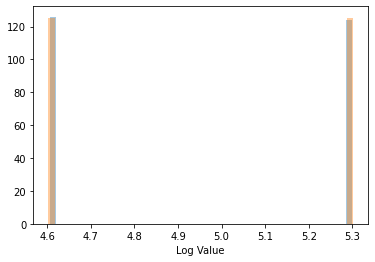

In [29]:
#Time Series - Log
sns.distplot(nlog_data['Log Value'],bins=50,kde = False)
z,_ = best_gmm1.sample(250)
sns.distplot(z,bins=50,kde=False)

In [30]:
#Time Series - Log
print(best_gmm1.score(np.array(nlog_data['Log Value']).reshape(-1,1)))
#print(best_gmm1.score(z))

5.295701554644926


Results of GMM on fft data

In [31]:
freq_ampli.describe()

,Freq,Ampli
count,125.000000,125.000000
mean,0.248000,4.605897
std,0.144914,27.219024
min,0.000000,0.010056
25%,0.124000,0.451377
50%,0.248000,0.884241
75%,0.372000,1.521690
max,0.496000,299.200000


In [32]:
best_gmm2

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [33]:
best_gmm2.weights_

array([0.79757463, 0.01612903, 0.1701676 , 0.01612874])

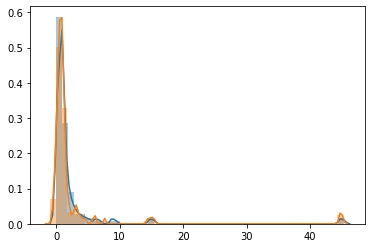

In [34]:
#Frequency
freq1 = freq_ampli.iloc[1:,1:]
y,_ = best_gmm2.sample(125)
sns.distplot(freq1)
sns.distplot(y)

In [35]:
#Freq
print(best_gmm2.score(freq1))
#print(best_gmm2.score(y))

-1.4468568343589925


Results of GMM on cepstrum data

In [36]:
cep.describe()

,Quefrency,Cepstrum
count,125.000000,125.000000
mean,12.449799,15.117068
std,7.274788,105.211696
min,0.000000,-175.334761
25%,6.224900,5.613421
50%,12.449799,6.332126
75%,18.674699,8.060594
max,24.899598,1157.439946


In [37]:
best_gmm3

GaussianMixture(covariance_type='spherical', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [38]:
best_gmm3.weights_

array([0.50781955, 0.00806452, 0.00806452, 0.00806448, 0.14911218,
       0.31887475])

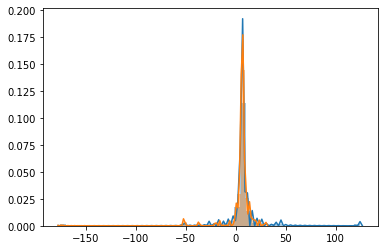

In [39]:
cep1 = cep.iloc[1:,1:]
z,_ = best_gmm3.sample(125)
sns.distplot(cep1)
sns.distplot(z)

In [40]:
print(best_gmm3.score(cep1))
#print(best_gmm3.score(z))

-2.6903264189963503
